In [1]:
####
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import math

from matplotlib.patches import Rectangle, Circle
import seaborn as sns
from __future__ import print_function
from IPython.display import display

In [2]:
color_scheme =  "Set2" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette(color_scheme)
sns.set_style("whitegrid")

# Set defaults
# should maybe include preamble like http://matplotlib.org/users/pgf.html
publication_figures= True
if publication_figures:
    mpl.rc('font',**{
            'family': 'serif',
            'serif': ['Garamond'],
            'size' : 24
        }
    )

    mpl.rc('figure', 
           figsize=(4,4),
           dpi=300,
           autolayout=True,
           facecolor="FFFFFF",
           edgecolor="000000"
    )
    mpl.rc('axes', 
       labelsize=10, 
       titlesize=14,
       facecolor="FFFFFF",
       edgecolor="000000",
       grid=False,
       linewidth=1
           
    
    )
    mpl.rc('xtick', 
       labelsize=10, 
    )
    mpl.rc('ytick', 
       labelsize=10, 
    )


else: # Screeen figures
    mpl.rc('font',**{
            'family': 'serif',
            'serif': ['Garamond'],
            'size' : 32
        }
    )

    mpl.rc('figure', 
           figsize=(4,4),
           dpi=300,
           autolayout=True,
           facecolor="FFFFFF",
           edgecolor="000000"
    )
    mpl.rc('axes', 
       labelsize=20, 
       titlesize=14,
       facecolor="FFFFFF",
       edgecolor="000000",
       grid=False,
       linewidth=1
           
    
    )
    mpl.rc('xtick', 
       labelsize=14, 
    )
    mpl.rc('ytick', 
       labelsize=14, 
    )

#mpl.rc('text', 
#       usetex=True
#)


mpl.rc('savefig',
       dpi=300,
       facecolor="FFFFFF",
       edgecolor="000000"
)

In [3]:
SaveFigs=False

In [4]:
#IMPORT DATA, CHECK PATH
#15 MeV data 1 variables
dataPinholeImported=pd.read_csv("../o82458_15MeVp.csv", skiprows=5, header=None)
dataPinholeMeV15 = np.flipud(dataPinholeImported)
width1,length1=dataPinholeMeV15.shape
converter1= 10.0/width1
boxwidth1SI, boxlength1SI = 85, 93
boxwidth1,boxlength1 = boxwidth1SI*converter1,boxlength1SI*converter1
xmin1SI,ymin1SI = 80, ((length1-150))
xmin1,ymin1 = xmin1SI*converter1, ((ymin1SI-boxlength1)*converter1)


#3 MeV data 1 variables
dataPinholeImported=pd.read_csv("../o82458-3MeVp.csv", skiprows=5, header=None)
dataPinholeMeV3 = np.flipud(dataPinholeImported)
width2,length2=dataPinholeMeV3.shape
converter2= 10.0/width2
boxwidth2SI, boxlength2SI = boxwidth1SI, boxlength1SI #pixels
boxwidth2,boxlength2 = boxwidth2SI*converter2,boxlength2SI*converter2 #centimeters
xmin2SI,ymin2SI = 75, ((length1-130))
xmin2,ymin2 = xmin2SI*converter2, ((ymin2SI-boxlength2)*converter2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


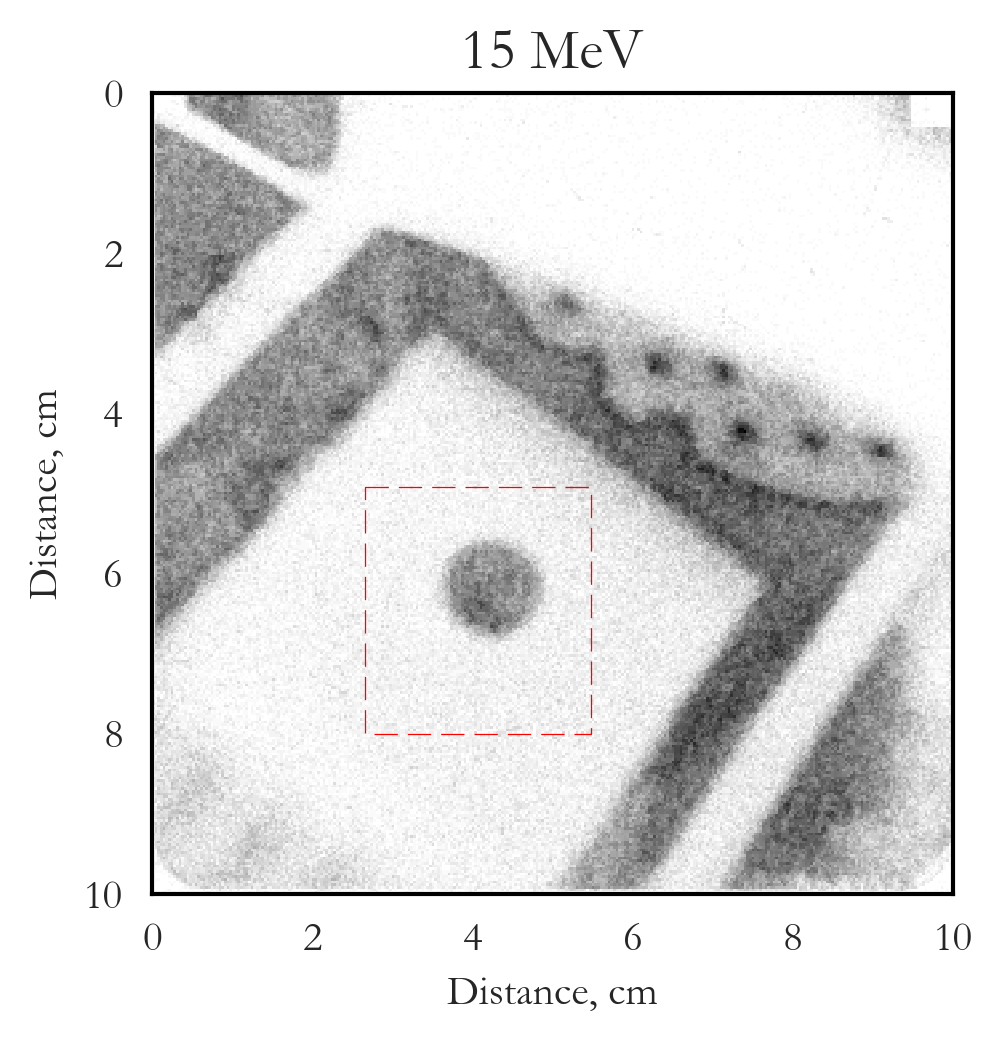

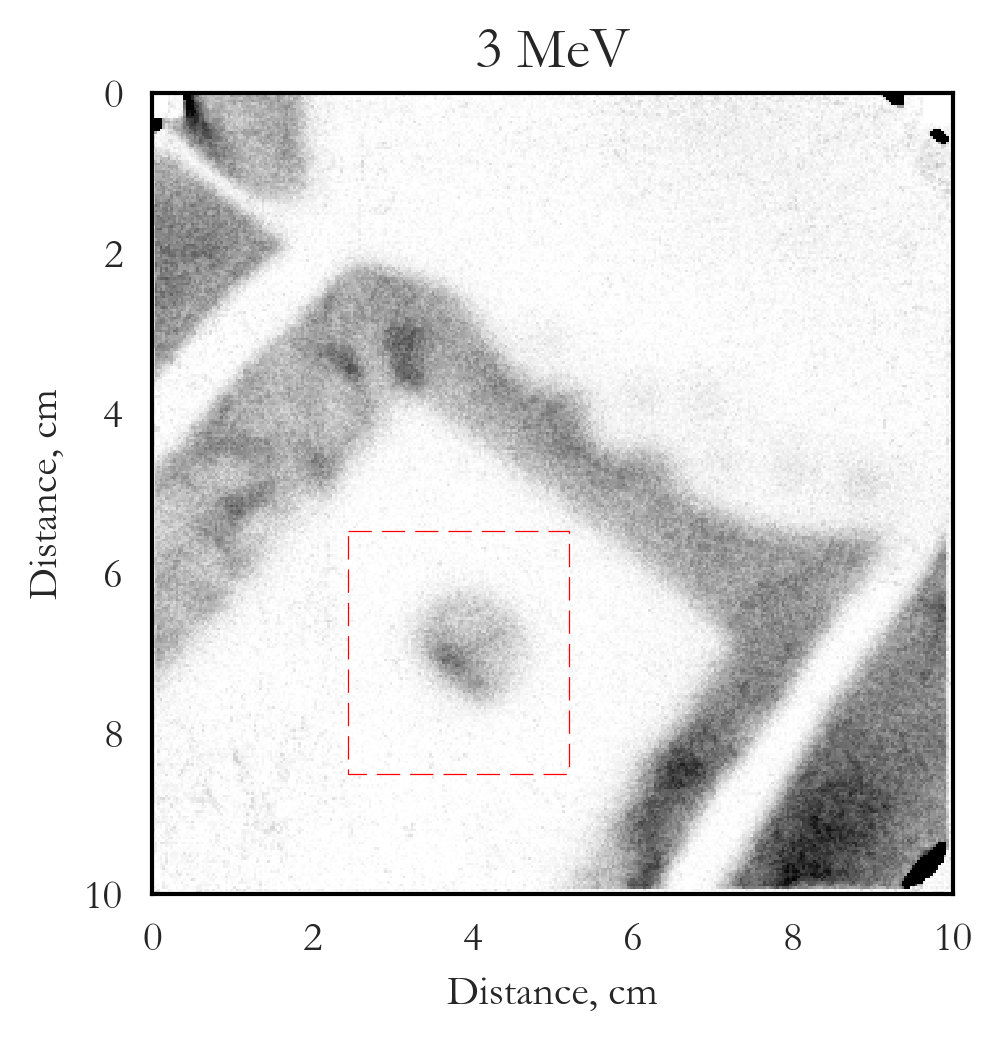

In [5]:
#15 MeV

fig1,ax1=plt.subplots(1)
ax1.imshow(dataPinholeMeV15, cmap='gray_r', interpolation='none', extent=[0,10,10,0])
ax1.set_aspect(1)

rect1 = Rectangle(
    (xmin1,ymin1), 
    boxwidth1, boxlength1,
    facecolor="none",
    edgecolor="r",
    linestyle="--"
)
plt.title('15 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
ax1.add_patch(rect1)
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_15MeV_data1.png")

#3 MeV

fig2,ax2=plt.subplots(1)
ax2.imshow(dataPinholeMeV3, cmap='gray_r', interpolation='none', extent=[0,10,10,0])
ax1.set_aspect(1)

rect2 = Rectangle(
    (xmin2,ymin2), 
    boxwidth2, boxlength2,
    facecolor="none",
    edgecolor="r",
    linestyle="--"
)
plt.title('3 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
ax2.add_patch(rect2)
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_3MeV_data1.png")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


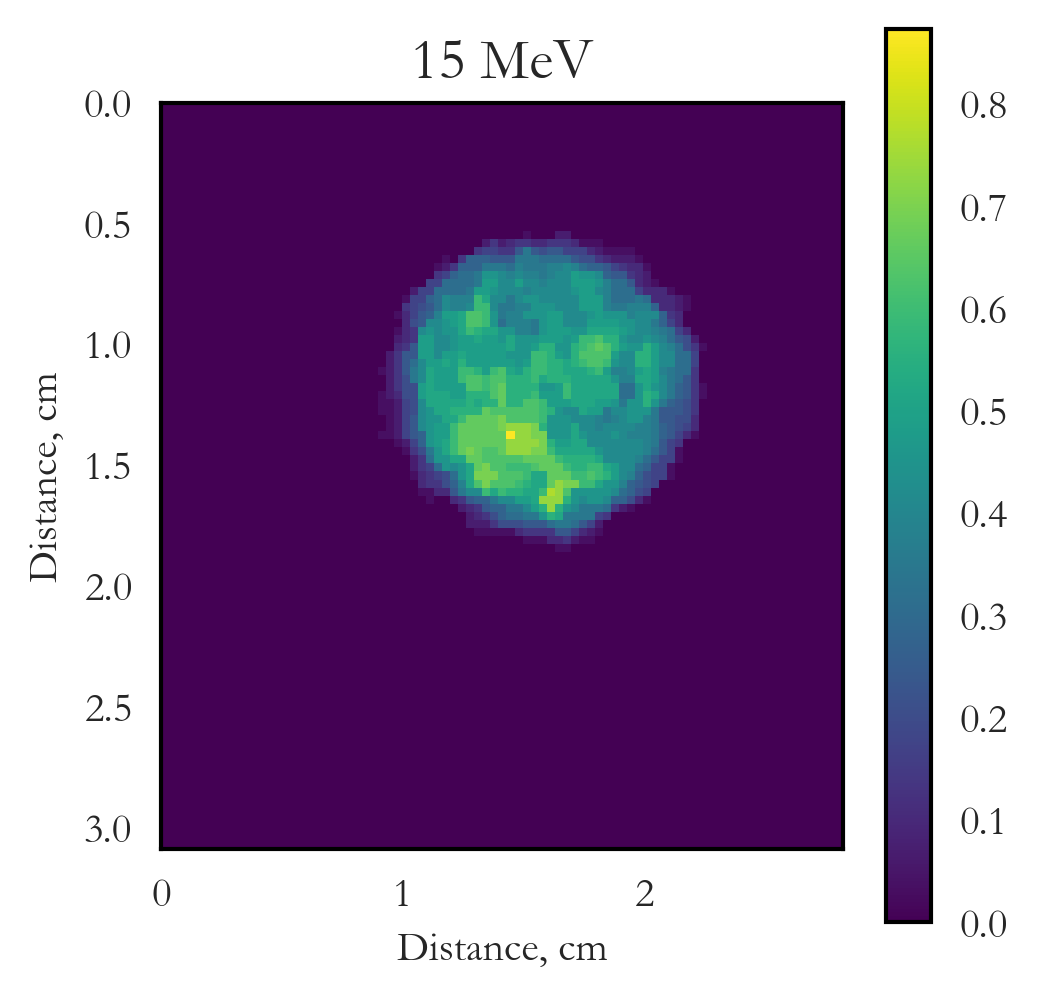

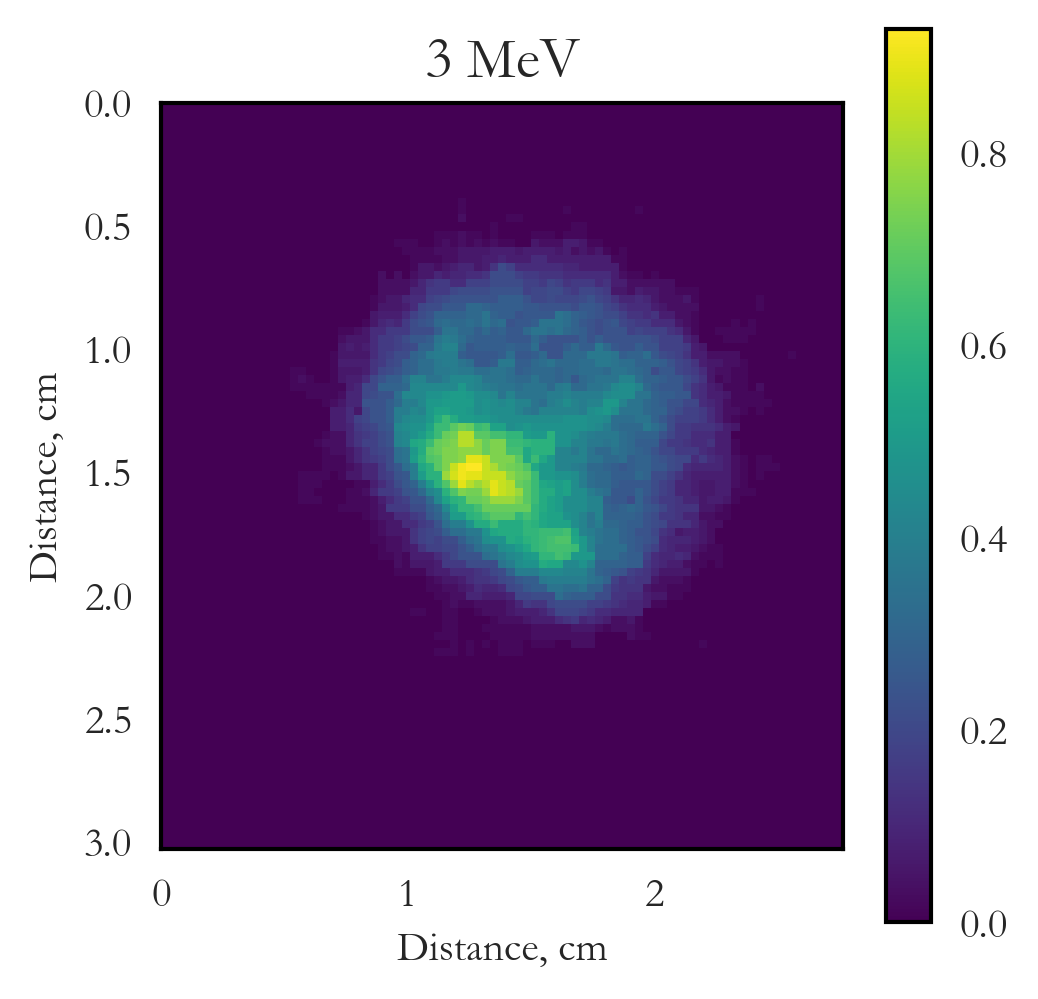

In [6]:
#Slices from data1
from scipy.signal import medfilt

#15 MeV
dataPinholeSlice15 = medfilt(dataPinholeMeV15[ymin1SI: ymin1SI+boxlength1SI: 1,
                           xmin1SI: xmin1SI+boxwidth1SI: 1
                          ])
dataPinholeSlice15UF = (dataPinholeMeV15[ymin1SI: ymin1SI+boxlength1SI: 1,
                           xmin1SI: xmin1SI+boxwidth1SI: 1
                          ])
maskSlice15 = dataPinholeSlice15>=5
dataPinholeSlice15=(dataPinholeSlice15UF-5)/(np.sum(dataPinholeSlice15UF[maskSlice15])/(math.pi*(0.3/2.0)**2))*10000
dataPinholeSlice15=medfilt(dataPinholeSlice15)
dataPinholeSlice15[~maskSlice15]=0

figSlice1, axSlice1=plt.subplots(1, figsize=(4,4))
widthSlice1, lengthSlice1=dataPinholeSlice15.shape
cax1=axSlice1.imshow(dataPinholeSlice15, cmap="viridis", interpolation='none', 
                extent=[0,10.0/length1*lengthSlice1,10.0/width1*widthSlice1,0])
cbar = figSlice1.colorbar(cax1)
#pd.DataFrame(dataPinholeSlice15).to_csv("look.csv")
#cbar.set_clim(-0.0, 6.0)
plt.title('15 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_15MeV_slice.png",bbox_inches='tight')


#3 MeV

dataPinholeSlice3 = medfilt(dataPinholeMeV3[ymin2SI: ymin2SI+boxlength2SI: 1,
                           xmin2SI: xmin2SI+boxwidth2SI: 1
                          ])
dataPinholeSlice3UF = (dataPinholeMeV3[ymin2SI: ymin2SI+boxlength2SI: 1,
                           xmin2SI: xmin2SI+boxwidth2SI: 1
                          ])
maskSlice3 = dataPinholeSlice3>=3
dataPinholeSlice3=(dataPinholeSlice3UF-3)/(np.sum(dataPinholeSlice3UF[maskSlice3])/(math.pi*(0.3/2.0)**2))*10000
dataPinholeSlice3=medfilt(dataPinholeSlice3)
dataPinholeSlice3[~maskSlice3]=0

figSlice2, axSlice2=plt.subplots(1, figsize=(4,4))
widthSlice2, lengthSlice2=dataPinholeSlice3.shape
cax2=axSlice2.imshow(dataPinholeSlice3,cmap="viridis", interpolation='none', 
                extent=[0,10.0/length2*lengthSlice2,10.0/width2*widthSlice2,0])
cbar = figSlice2.colorbar(cax2)
plt.title('3 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_3MeV_slice.png",bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


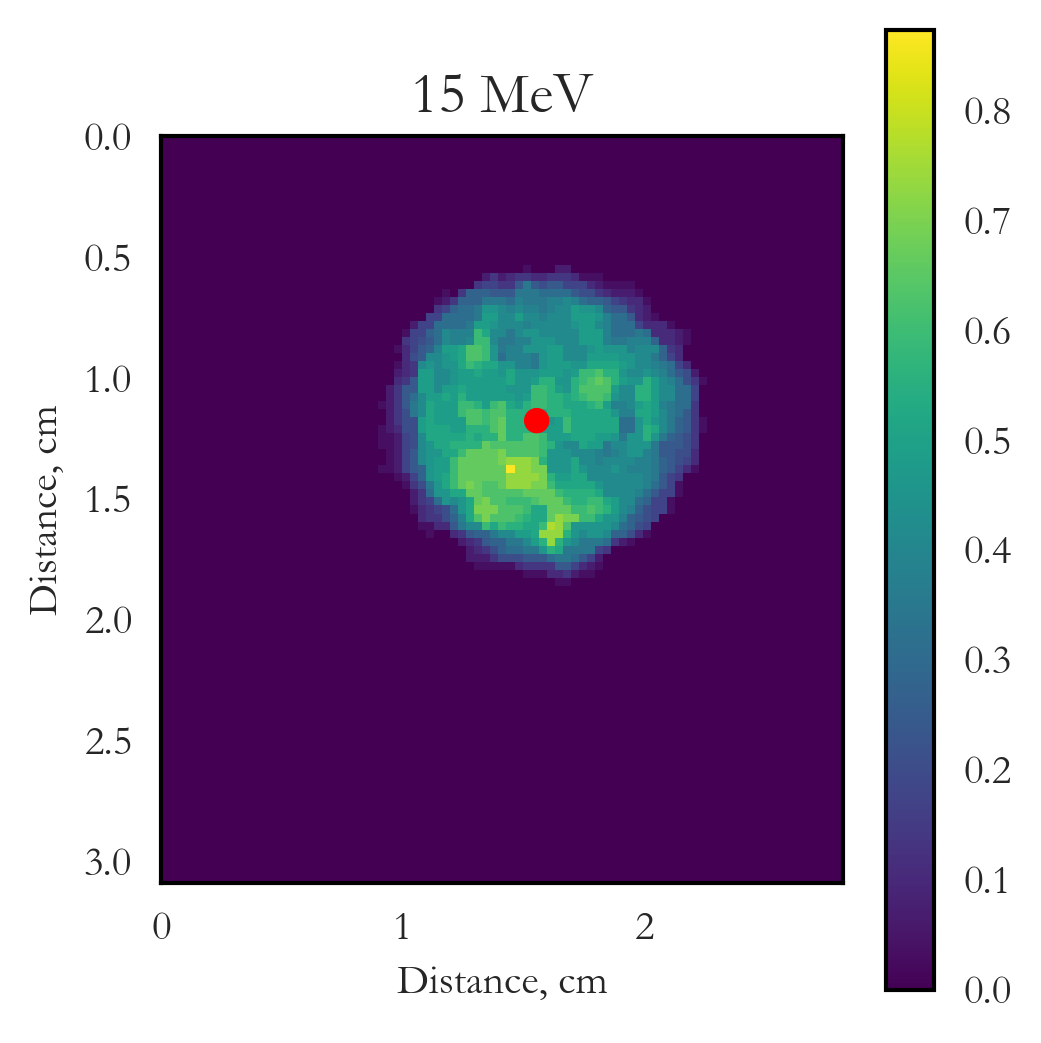

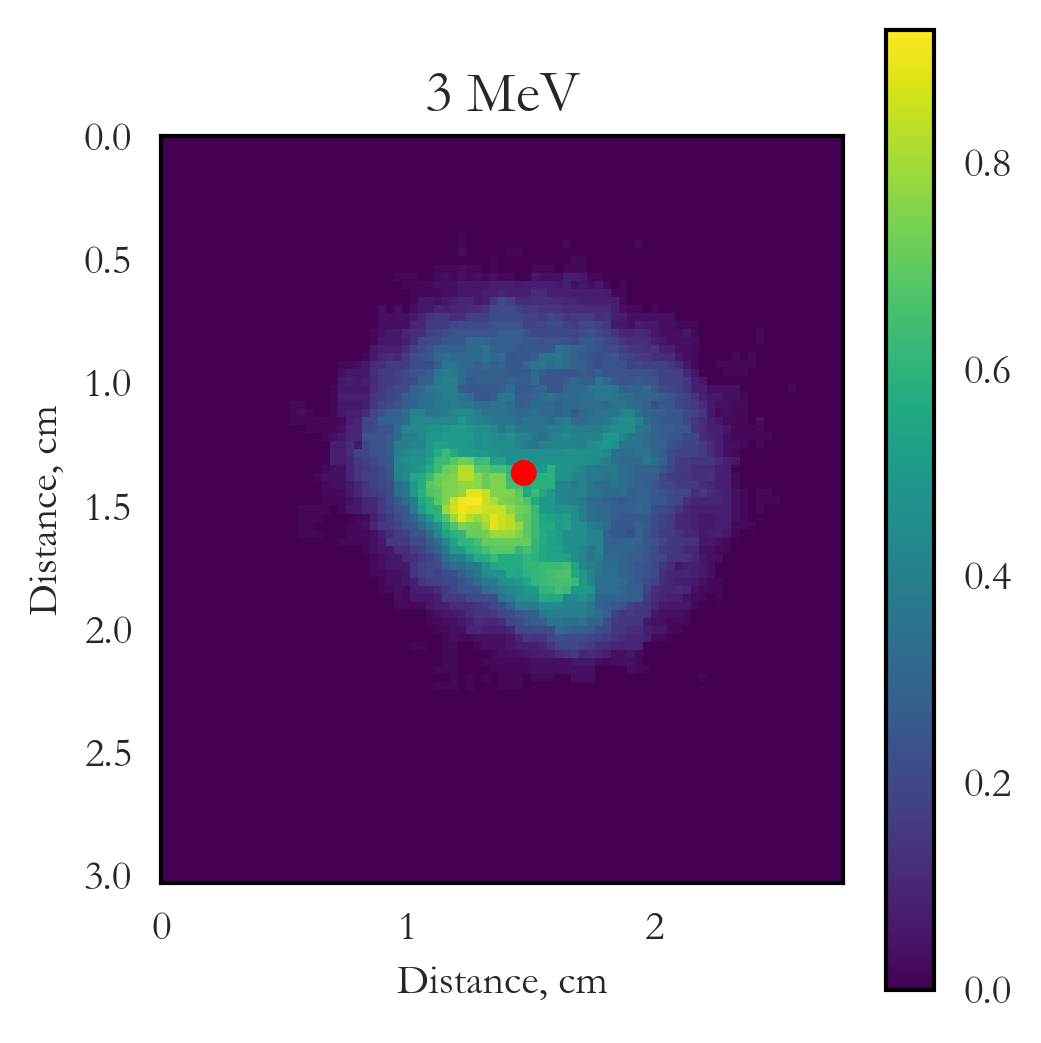

In [7]:
#CoM calculations, data 1
#15 MeV
from scipy.ndimage.measurements import center_of_mass
xcom1,ycom1=center_of_mass(dataPinholeSlice15)
#xcom1data2,ycom1data2=center_of_mass(dataPinholeSlice15data2)
#ADD COM FOR DATA2 HERE

figCom1,axCom1 = plt.subplots(1)
cax1=axCom1.imshow(dataPinholeSlice15, cmap='viridis',interpolation='none', 
                extent=[0,10.0/length1*lengthSlice1,10.0/width1*widthSlice1,0])
cbar = figCom1.colorbar(cax1)

circ1 = Circle(
    (ycom1*converter1,xcom1*converter1), 
    .05,
    facecolor="r",
    edgecolor="r"
)
axCom1.add_patch(circ1)
plt.title('15 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
plt.savefig("82458data_v3/82458shot_15MeV_CoM.png")
#circ1data2 = Circle(
#    (xcom1data2*converter1,ycom1data2*converter1), 
#    .05,
#    facecolor="m",
#    edgecolor="m"
#)
#axCom1.add_patch(circ1data2)
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_15MeV_CoM_both.png")

#3 MeV
xcom2,ycom2=center_of_mass(dataPinholeSlice3)
#xcom2data2,ycom2data2=center_of_mass(dataPinholeSlice3data2)
#ADD COM FOR DATA2 HERE

figCom2,axCom2 = plt.subplots(1)
cax2=axCom2.imshow(dataPinholeSlice3, cmap='viridis', interpolation='none', 
                extent=[0,10.0/length2*lengthSlice2,10.0/width2*widthSlice2,0])
cbar = figCom2.colorbar(cax2)

circ2 = Circle(
    (ycom2*converter2,xcom2*converter2), 
    .05,
    facecolor="r",
    edgecolor="r"
)
axCom2.add_patch(circ2)
plt.title('3 MeV')
plt.xlabel('Distance, cm')
plt.ylabel('Distance, cm')
plt.savefig("82458data_v3/82458shot_3MeV_CoM.png")
#circ2data2 = Circle(
#    (xcom2data2*converter2,ycom2data2*converter2), 
#    .05,
#    facecolor="m",
#    edgecolor="m"
#)
#axCom2.add_patch(circ2data2)
if SaveFigs:
    plt.savefig("82458data_v3/82458shot_3MeV_CoMboth.png")


In [8]:
CoMdata = {'x value, pixel': pd.Series([xcom1,xcom2],  
           index=['15 MeV data 1','3 MeV data 1' ]),
           'y value, pixel': pd.Series([ycom1,ycom2],
           index=['15 MeV data 1','3 MeV data 1']) ,
           'some difference, microns': pd.Series([np.sqrt((xcom1-0)**2+(ycom1-0)**2)*10000./float(width1), 
                                             np.sqrt((xcom2-0)**2+(ycom2-0)**2)*10000./float(width1)],
                                            index=['15 MeV data 2','3 MeV data 2'])
          }

pd.DataFrame(CoMdata).to_csv("82458data_v3/CoM.csv")
CoMdata

{'some difference, microns': 15 MeV data 2    1949.350675
 3 MeV data 2     2047.679390
 dtype: float64, 'x value, pixel': 15 MeV data 1    35.406282
 3 MeV data 1     41.928370
 dtype: float64, 'y value, pixel': 15 MeV data 1    46.788933
 3 MeV data 1     45.176360
 dtype: float64}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


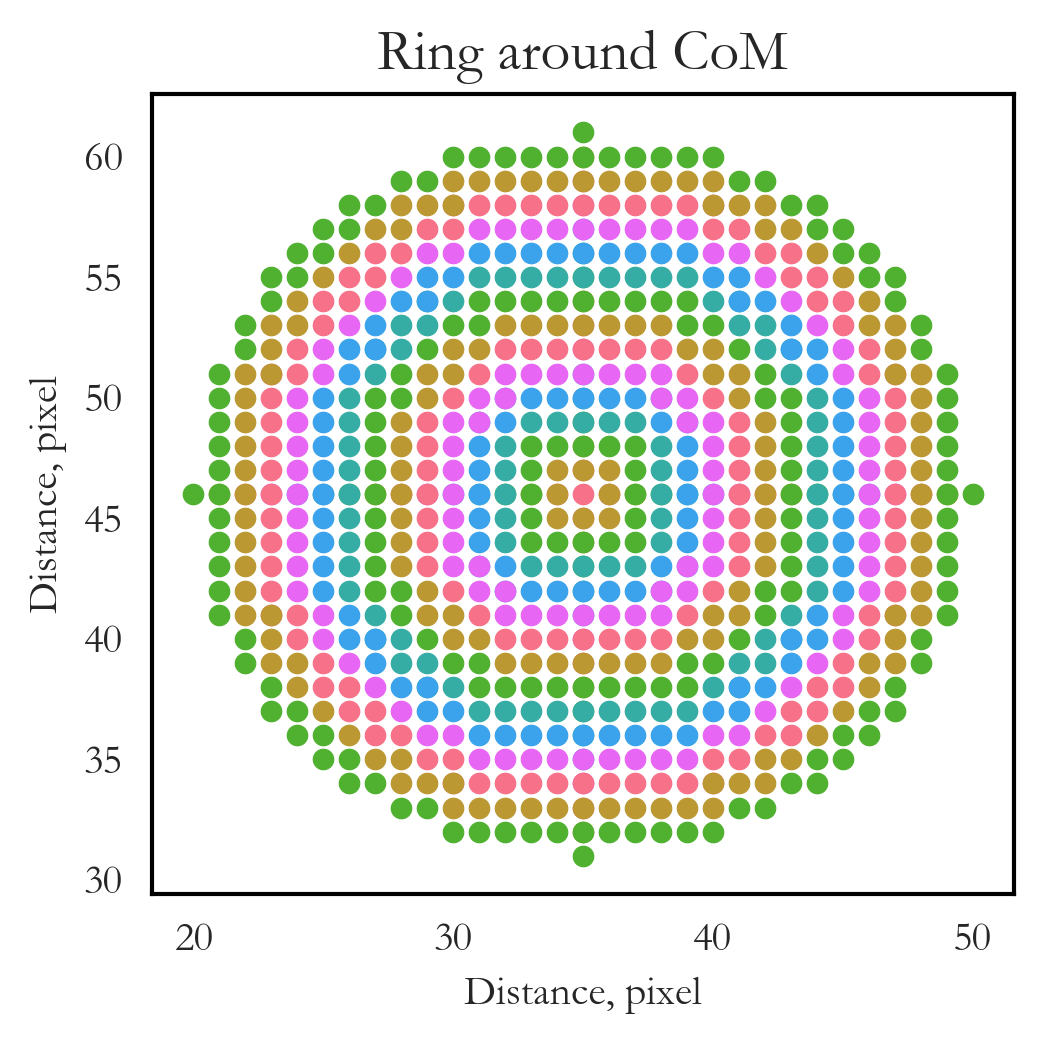

In [9]:
#xcom,ycom = int(xcom), int(ycom)

def ring(radius, xcom, ycom):
    return [(int(x),int(y)) for x in np.arange(xcom-2*radius-2, xcom+2*radius+2)
                  for y in np.arange(ycom-2*radius-2, ycom+2*radius+2)
            if 0 <= np.sqrt((x-xcom)**2 + (y-ycom)**2) - radius<= 1
           ]
color_scheme =  "husl" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette(color_scheme)
for i in range(15):
    plt.scatter(*zip(*ring(i, xcom1, ycom1)), s=24)


plt.title('Ring around CoM')
plt.xlabel('Distance, pixel')
plt.ylabel('Distance, pixel')
if SaveFigs:
    plt.savefig("82458data_v3/Ring_around_CoM.png")
    

def ringMean(dataEx,radius, xcom, ycom):
    #print([dataEx[ix] for ix in ring(radius, xcom, ycom)])
    return np.nanmean([dataEx[ix] for ix in ring(radius, xcom, ycom)])
def ringStDev(dataEx,radius, xcom, ycom):
    return np.std([dataEx[ix] for ix in ring(radius, xcom, ycom)])
def ringIntegral(dataEx,radius, xcom, ycom):
    return (np.nansum([dataEx[ix] for ix in ring(radius, xcom, ycom)])  ) # dA=2pi r, dr=1
def rmsCalc(dataEx, radius, xcom, ycom):
    fluxArray = [(int(x),int(y)) for x in np.arange(xcom-2*radius-2, xcom+2*radius+2)
                  for y in np.arange(ycom-2*radius-2, ycom+2*radius+2)
                 if 0 <= radius - np.sqrt((x-xcom)**2 + (y-ycom)**2) 
                ]
    fluxVals = [dataEx[fluxArray[ix]]for ix in range(len(fluxArray))
               ]
    return np.sqrt(np.mean(np.asarray(fluxVals)**2) - np.mean(np.asarray(fluxVals))**2)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


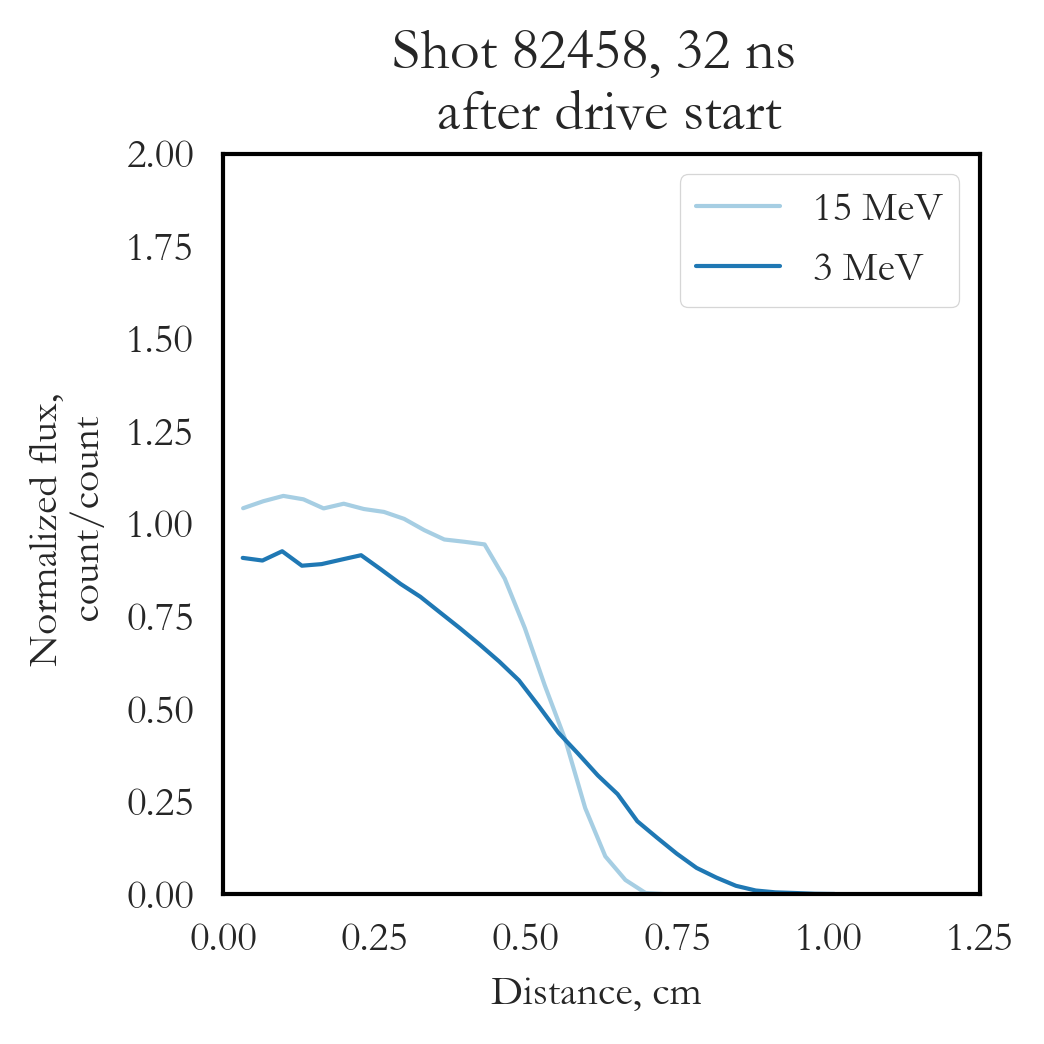

In [10]:
#Take lineouts
ringLength1 =29
xarray1 = np.arange(1, ringLength1,1)
ringListOfMean1=([ringMean(dataPinholeSlice15, radius, xcom1, ycom1) 
                for radius in xarray1]/np.sum([ringIntegral(dataPinholeSlice15, radius,  xcom1, ycom1) 
                for radius in xarray1 ])*10**3)
xarray1 = xarray1*10/width1
ringListOfMean1=ringListOfMean1

#figOut1,axOut1 = plt.subplots(1)
#axOut1.plot(xarray1, ringListOfMean1)

ringLength2 =32
xarray2 = np.arange(1, ringLength2,1)
ringListOfMean2=([ringMean(dataPinholeSlice3, radius, xcom2, ycom2) 
                for radius in xarray2]/np.sum([ringIntegral(dataPinholeSlice3, radius, xcom2, ycom2) 
                for radius in xarray2 ])*10**3)
xarray2 = xarray2*10/width2
ringListOfMean2=ringListOfMean2

xs15=np.linspace(.5,.6,10)
ys15=-5.75*xs15+3.75
xs3=np.linspace(.45,.7,10)
ys3=-4.2*xs3+3.3

#figOut1,axOut1 = plt.subplots(1, figsize=(8,8))
#axOut1.plot(xarray2, ringListOfMean2)

publication_figures=True
def plot_Output():
    color_scheme =  "Paired" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
    sns.set_palette(color_scheme)
    plt.xlabel('Distance, cm ')
    plt.ylabel('Normalized flux, \n count/count')
    plt.title('Shot 82458, 32 ns \n after drive start')
    plt.plot(xarray1,ringListOfMean1,
                 label="15 MeV",
                 linewidth=1,
                )
   
    plt.plot(xarray2,ringListOfMean2,
                 label="3 MeV",
                 linewidth=1
                )
   
    plt.legend(loc="best",frameon=True)
    plt.axis([0, 1.25, 0, 2])
    #plt.set_xlim(0,1.25)
    plt.tight_layout
    plt.savefig("82458data_v3/comparison_plot.png",bbox_inches='tight')
    
    plt.show()


    
plot_Output()

np.savetxt("paper_fig_data/82458_15MeV_lineout.csv", np.asarray([xarray1,ringListOfMean1]).T.tolist(), delimiter=",")
np.savetxt("paper_fig_data/82458_3MeV_lineout.csv", np.asarray([xarray2,ringListOfMean2]).T.tolist(), delimiter=",")

In [23]:
#optimize Likelihood function, analysis to see if flat-top 2D Gaussian a good model.
def gaussianFit(dataEx, xcom, ycom):
    # theta = c, var ; c = (x,y)

    #Count N, number of points
    N = sum(sum(dataEx>0))
      
    
    #optimal c
    cx, cy =  np.int(xcom),np.int(ycom)
    
    #optimal variance
    vx, vy = np.where(dataEx>0)
    sigma = np.sqrt(1/2 * 1/N * np.sum(dataEx[vx,vy]*(vx - cx)**2 + (vy - cy)**2) )

    #likelihood function
    Llhfun = 1/(2*np.pi) * (sigma**(-2*N)) * np.exp(-1/2 * -N / (2*sigma**2 ) * 
                                                  np.sum((vx - cx)**2 + (vy - cy)**2))
              
    #ptheta, 2D Gaussian.
    x, y = np.meshgrid(np.linspace(0,dataEx.shape[0]-1, dataEx.shape[0]),
                       np.linspace(0,dataEx.shape[1]-1, dataEx.shape[1]),
                       indexing='ij'
                        )
    Dist = np.sqrt((x-cx)**2 + (y-cy)**2)
    PThetaArray = 1/(2*np.pi * sigma**(-2)) * np.exp(-1/2 * ((Dist)**2/(sigma**2)))
  
    #Is approximation good?
    Output = (PThetaArray / dataEx)
    Output[np.isnan(Output)] = 0
    Output[np.isinf(Output)] = 0
    #
    #print(Output[np.logical_and(Output>0, Output<1)])
    #Output[np.logical_and(Output>0, Output<1)] = 1/Output
    
    return Output

Bay15 = gaussianFit(dataPinholeSlice15, xcom1, ycom1)
Bay15

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: divide by zero encountered in true_divide


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


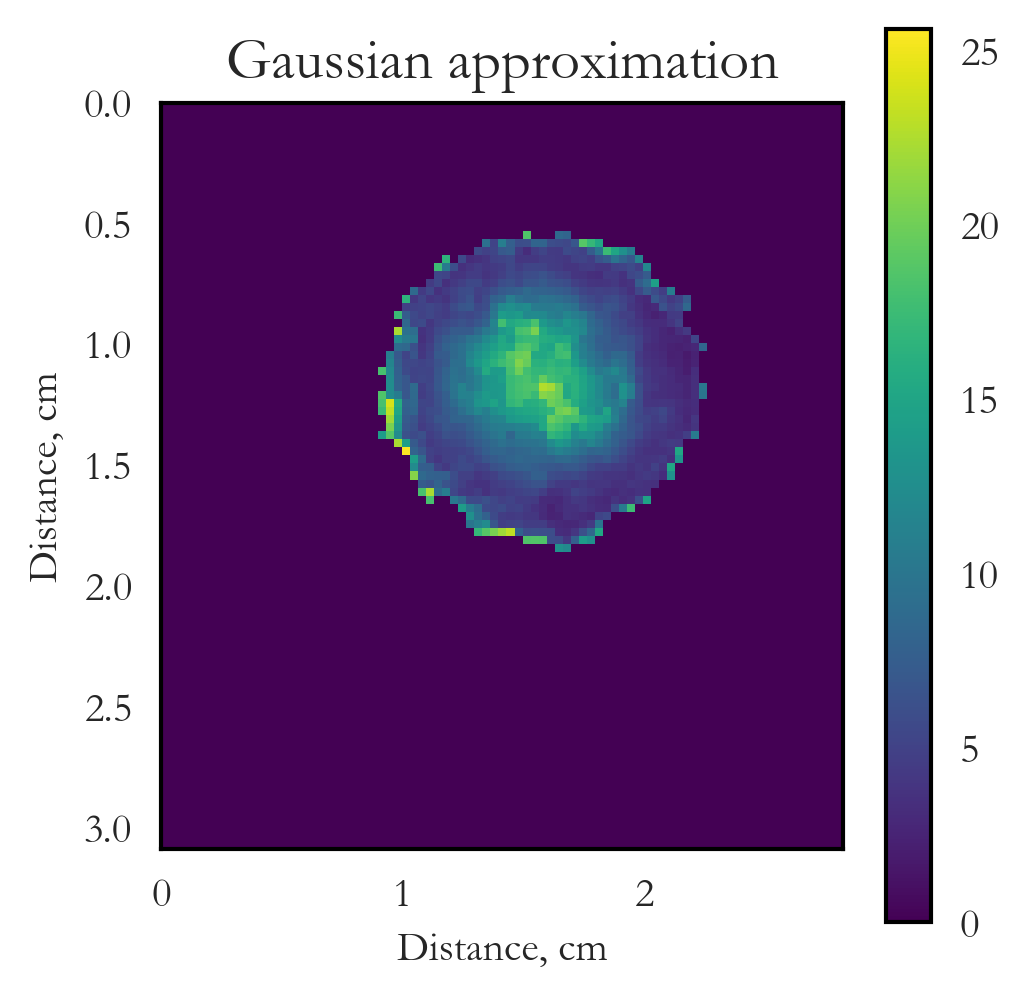

In [24]:
def plot_fit_overlay(dataEx):
    figSlice1, axSlice1=plt.subplots(1, figsize=(4,4))
    widthSlice1, lengthSlice1=dataEx.shape
    cax1=axSlice1.imshow(dataEx, cmap="viridis", interpolation='none', 
                         extent=[0,10.0/length1*lengthSlice1,10.0/width1*widthSlice1,0]
                        )
    cbar = figSlice1.colorbar(cax1)
    #pd.DataFrame(dataPinholeSlice15).to_csv("look.csv")
    #cbar.set_clim(-0.0, 6.0)
    plt.title('Gaussian approximation')
    plt.xlabel('Distance, cm')
    plt.ylabel('Distance, cm')
    
plot_fit_overlay(Bay15)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


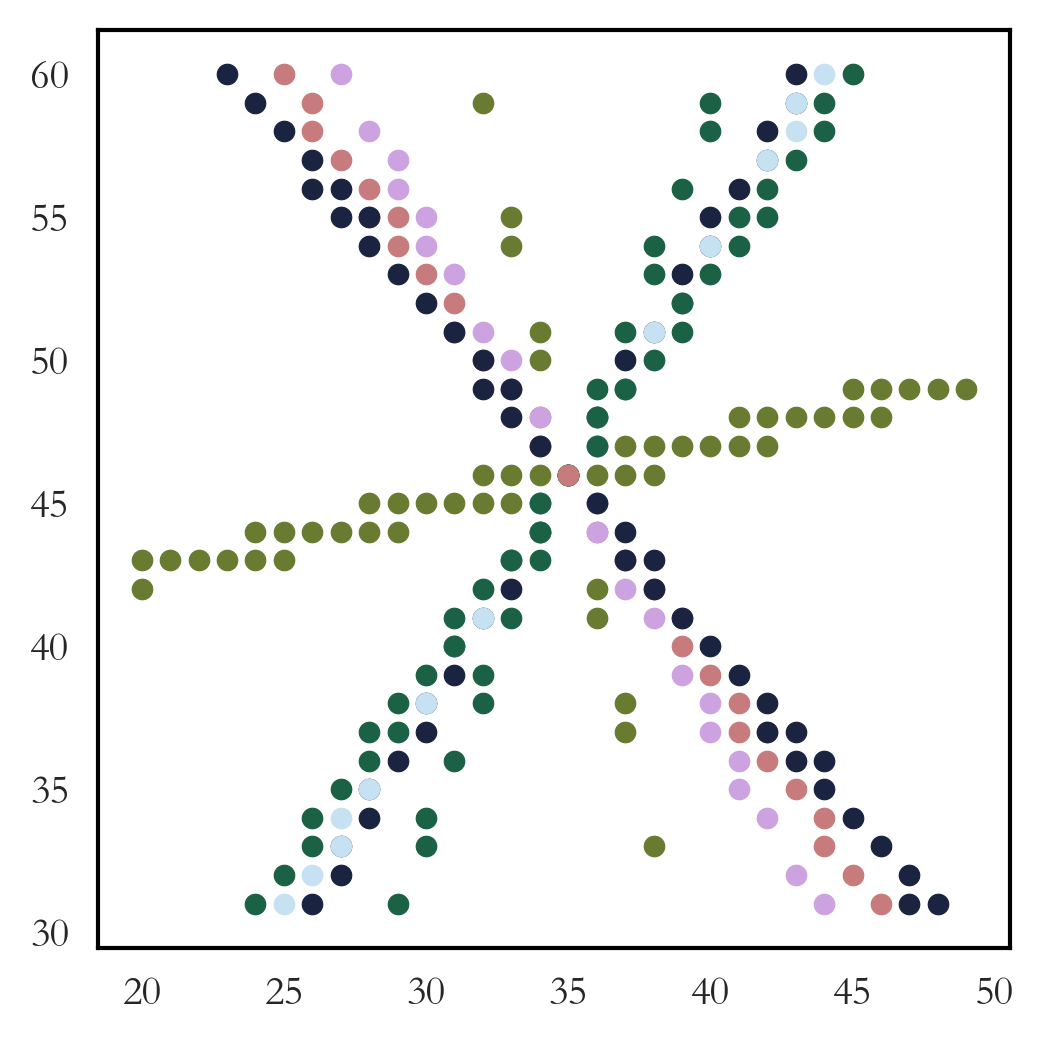

In [17]:
#MAKE THIS ITERABLE FOR MULTIPLE LINEOUTS
def randomLineout(radius, xcom, ycom):
    #for i in range(linecount):
        angle = np.random.randint(0,180)
        slope = np.sin(angle*np.pi/180)/np.cos(angle*np.pi/180)
        intercept = ycom-(slope*xcom)
        xradius = xcom + np.sqrt(radius**2/(1+slope**2))
        yradius = slope*(xradius-xcom)+ycom  
        return [(int(x),int(y)) for x in np.arange(xcom-radius, xcom+radius)
                      for y in np.arange(ycom-radius, ycom+radius)
                if -0.75 <= y-(slope*x)-intercept <= 0.75
            #x in range(*sorted((int(xcom), int(xradius ) ))) and
            #y in range(*sorted((int(ycom), int(yradius ) )))
           ]
color_scheme =  "cubehelix" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette(color_scheme)
for i in range(10):
    plt.scatter(*zip(*randomLineout(15, xcom1, ycom1)), s=24)
    



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


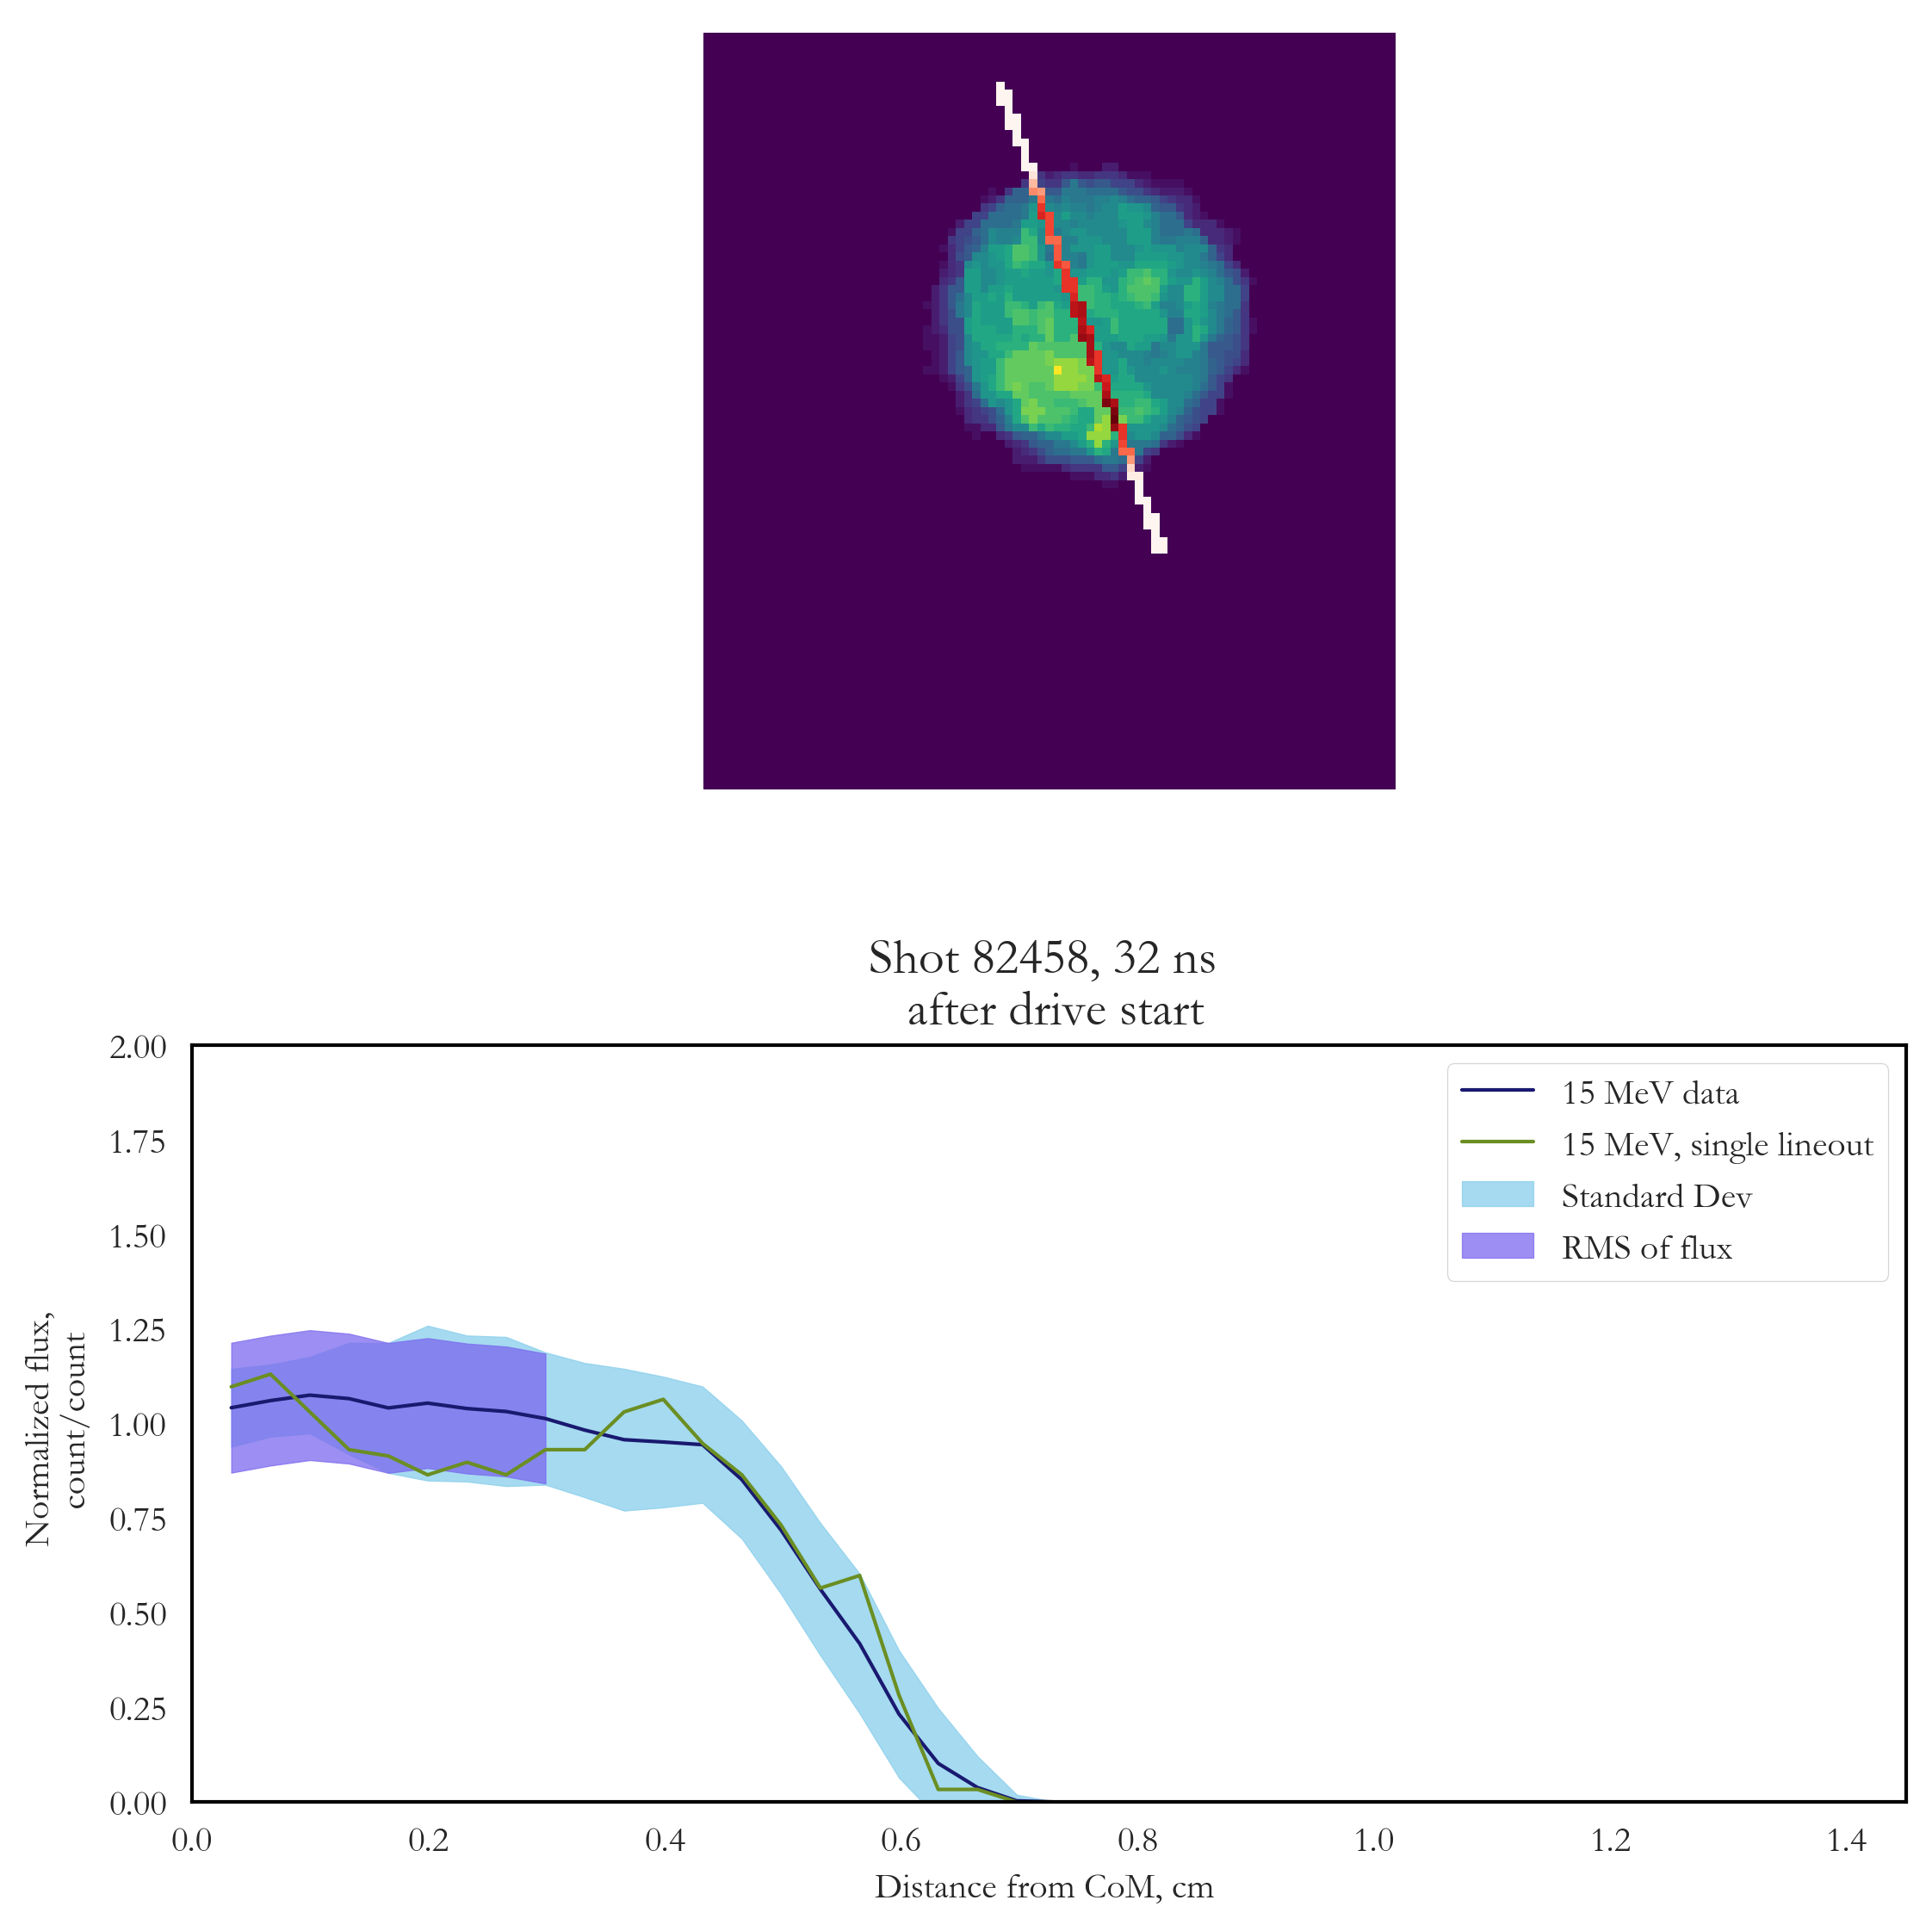

In [21]:
#Take ring lineouts
ringLength1 =29
rmsLength = 9
xarray1 = np.arange(1, ringLength1,1)
ringListOfMean1=([ringMean(dataPinholeSlice15, radius, xcom1, ycom1) 
                for radius in xarray1]/np.sum([ringIntegral(dataPinholeSlice15, radius,  xcom1, ycom1) 
                for radius in xarray1 ])*10**3)
ringListOfstd1=([ringStDev(dataPinholeSlice15, radius, xcom1, ycom1) 
                for radius in xarray1]/np.sum([ringIntegral(dataPinholeSlice15, radius,  xcom1, ycom1) 
                for radius in xarray1 ])*10**3)
ringstdupper, ringstdlower = np.zeros_like(ringListOfMean1), np.zeros_like(ringListOfMean1)
ringrmsupper, ringrmslower = np.zeros(rmsLength), np.zeros(rmsLength)
rmsVal = rmsCalc(dataPinholeSlice15, rmsLength, xcom1, ycom1)/np.sum([ringIntegral(dataPinholeSlice15, radius,  xcom1, ycom1) 
                for radius in xarray1 ])*10**3
for ix in range(len(ringListOfMean1)):
    ringstdupper[ix], ringstdlower[ix] = ringListOfMean1[ix]+ringListOfstd1[ix],ringListOfMean1[ix]-ringListOfstd1[ix]
for ix in range(rmsLength):
    (ringrmsupper[ix], ringrmslower[ix]) = (ringListOfMean1[ix]+np.abs(rmsVal),
                                          ringListOfMean1[ix]-np.abs(rmsVal) )
xarray1 = xarray1*10/width1
xarray1cat = xarray1[:rmsLength]


#Take random lineouts
ringLength1 =29
linecount1 = 1
xarray1 = np.arange(1, ringLength1,1)
lineMask1= np.full_like(dataPinholeSlice15, np.nan)
for i in range(linecount1):
    for ix in randomLineout(ringLength1, xcom1, ycom1):
       lineMask1[ix]=dataPinholeSlice15[ix]
maskeddata15 = ([ringMean(lineMask1,radius, xcom1, ycom1) 
                for radius in xarray1]/np.nansum([ringIntegral(dataPinholeSlice15, radius,  xcom1, ycom1) 
                for radius in xarray1 ])*10**3)
xarray1 = xarray1*10/width1
#show image of linemask1?




publication_figures=True
def plot_Output(ax1, ax2):
    color_scheme =  "Paired" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
    sns.set_palette(color_scheme)
    ax1.set_aspect(aspect='equal', adjustable='box')
    ax1.imshow(dataPinholeSlice15, cmap='viridis')
    ax1.imshow(lineMask1, cmap='Reds')
    ax1.axis('off')
    
    ax2.set_xlabel('Distance from CoM, cm ')
    ax2.set_ylabel('Normalized flux, \n count/count')
    ax2.set_title('Shot 82458, 32 ns \n after drive start')
    
    ax2.plot(xarray1,ringListOfMean1,
                 label="15 MeV data",
                 linewidth=1,
                 color="midnightblue"
                )
    ax2.fill_between(xarray1, ringstdupper, ringstdlower, color="skyblue", label="Standard Dev", alpha=0.75)
    ax2.fill_between(xarray1cat, ringrmsupper, ringrmslower, color="mediumslateblue", label="RMS of flux",alpha=0.75)
    
    ax2.plot(xarray1,maskeddata15,
                 label="15 MeV, single lineout",
                 linewidth=1,
                 color="olivedrab"
                )
   
    ax2.legend(loc="best",frameon=True)
    ax2.set_xlim([0, 1.45])
    ax2.set_ylim([0, 2])

    
    
    #plt.show()


    
figLO,(ax01,ax02)=plt.subplots(nrows=2, figsize=(8,8))
figLO.subplots_adjust(wspace=.5, hspace=.5)
plot_Output(ax01, ax02)


plt.savefig("82458data_v3/15Mev_comparison_plot_random.png",bbox_inches='tight')

np.savetxt("error_analysis/82458_15MeV_data.csv", 
           np.asarray([xarray1,ringListOfMean1
                      ]).T.tolist(), delimiter=",")
np.savetxt("error_analysis/82458_15MeV_rms_errors.csv", 
           np.asarray([xarray1, ringstdupper, ringstdlower
                      ]).T.tolist(), delimiter=",")
np.savetxt("error_analysis/82458_15MeV_std_dev.csv", 
           np.asarray([xarray1cat, ringrmsupper, ringrmslower
                      ]).T.tolist(), delimiter=",")

#np.savetxt("paper_fig_data/82458_15MeV_lineout_random.csv", np.asarray([xarray1,maskeddata15]).T.tolist(), delimiter=",")
#np.savetxt("paper_fig_data/82458_3MeV_lineout_random.csv", np.asarray([xarray2,maskeddata3]).T.tolist(), delimiter=",")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


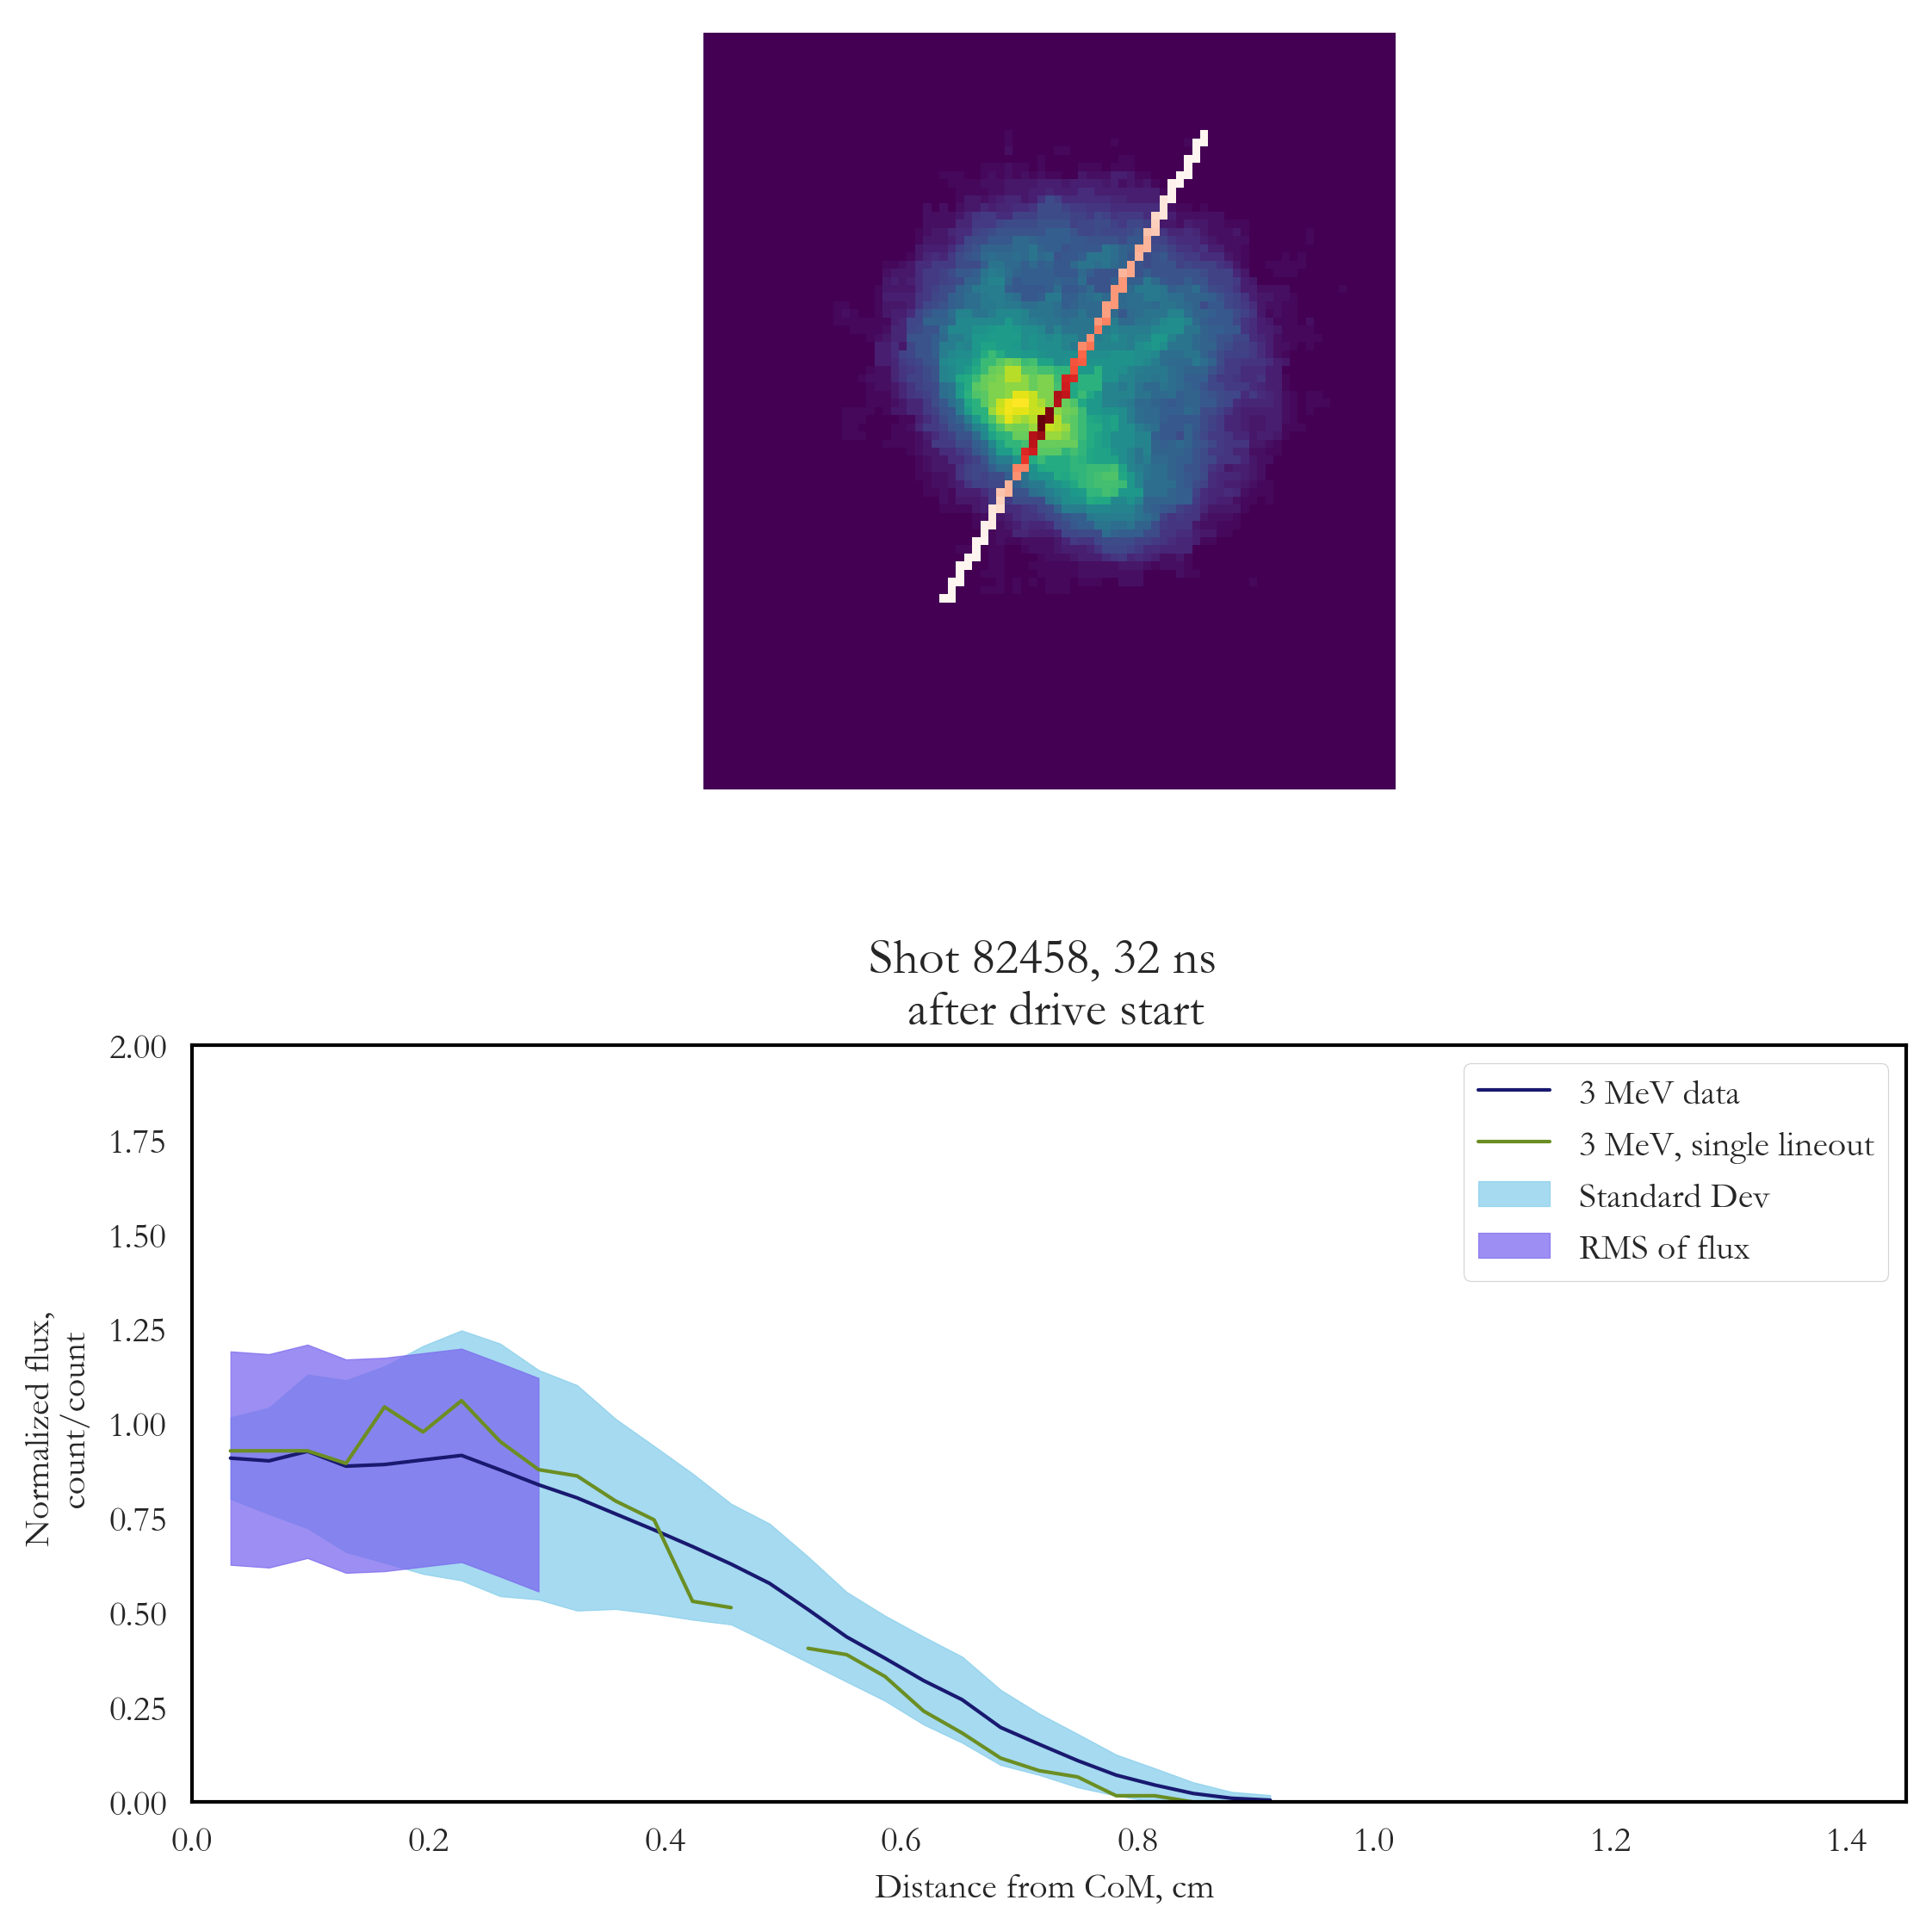

In [29]:
#Take ring lineouts
ringLength2 =29
rmsLength2 = 9
xarray2 = np.arange(1, ringLength2,1)
ringListOfMean2=([ringMean(dataPinholeSlice3, radius, xcom2, ycom2) 
                for radius in xarray2]/np.sum([ringIntegral(dataPinholeSlice3, radius,  xcom2, ycom2) 
                for radius in xarray2 ])*10**3)
ringListOfstd2=([ringStDev(dataPinholeSlice3, radius, xcom2, ycom2) 
                for radius in xarray2]/np.sum([ringIntegral(dataPinholeSlice3, radius,  xcom2, ycom2) 
                for radius in xarray2 ])*10**3)
ringstdupper2, ringstdlower2 = np.zeros_like(ringListOfMean2), np.zeros_like(ringListOfMean2)
ringrmsupper2, ringrmslower2 = np.zeros(rmsLength2), np.zeros(rmsLength2)
rmsVal2 = rmsCalc(dataPinholeSlice3, rmsLength2, xcom2, ycom2)/np.sum([ringIntegral(dataPinholeSlice3, radius,  xcom2, ycom2) 
                for radius in xarray2 ])*10**3
for ix in range(len(ringListOfMean2)):
    ringstdupper2[ix], ringstdlower2[ix] = ringListOfMean2[ix]+ringListOfstd2[ix],ringListOfMean2[ix]-ringListOfstd2[ix]
for ix in range(rmsLength):
    (ringrmsupper2[ix], ringrmslower2[ix]) = (ringListOfMean2[ix]+np.abs(rmsVal2),
                                          ringListOfMean2[ix]-np.abs(rmsVal2) )
xarray2 = xarray2*10/width2
xarray2cat = xarray2[:rmsLength2]


#Take random lineouts
ringLength2 =29
linecount2 = 1
xarray2 = np.arange(1, ringLength2,1)
lineMask2= np.full_like(dataPinholeSlice3, np.nan)
for i in range(linecount2):
    for ix in randomLineout(ringLength2, xcom2, ycom2):
       lineMask2[ix]=dataPinholeSlice3[ix]
maskeddata3 = ([ringMean(lineMask2,radius, xcom2, ycom2) 
                for radius in xarray2]/np.nansum([ringIntegral(dataPinholeSlice3, radius,  xcom2, ycom2) 
                for radius in xarray2 ])*10**3)
xarray2 = xarray2*10/width2
#show image of linemask1?


#figOut1,axOut1 = plt.subplots(1)
#axOut1.plot(xarray1, ringListOfMean1)

#figOut1,axOut1 = plt.subplots(1, figsize=(8,8))
#axOut1.plot(xarray2, ringListOfMean2)

publication_figures=True
def plot_Output(ax1, ax2):
    color_scheme =  "Paired" # "cubehelix" "husl" "Set2" http://seaborn.pydata.org/tutorial/color_palettes.html
    sns.set_palette(color_scheme)
    ax1.set_aspect(aspect='equal', adjustable='box')
    ax1.imshow(dataPinholeSlice3, cmap='viridis')
    ax1.imshow(lineMask2, cmap='Reds')
    ax1.axis('off')
    
    ax2.set_xlabel('Distance from CoM, cm ')
    ax2.set_ylabel('Normalized flux, \n count/count')
    ax2.set_title('Shot 82458, 32 ns \n after drive start')
    
    ax2.plot(xarray2,ringListOfMean2,
                 label="3 MeV data",
                 linewidth=1,
                 color="midnightblue"
                )
    ax2.fill_between(xarray2, ringstdupper2, ringstdlower2, color="skyblue", label="Standard Dev", alpha=0.75)
    ax2.fill_between(xarray2cat, ringrmsupper2, ringrmslower2, color="mediumslateblue", label="RMS of flux",alpha=0.75)
    
    ax2.plot(xarray2,maskeddata3,
                 label="3 MeV, single lineout",
                 linewidth=1,
                 color="olivedrab"
                )
   
    ax2.legend(loc="best",frameon=True)
    ax2.set_xlim([0, 1.45])
    ax2.set_ylim([0, 2])

    
    
    #plt.show()


    
figLO,(ax01,ax02)=plt.subplots(nrows=2, figsize=(8,8))
figLO.subplots_adjust(wspace=.5, hspace=.5)
plot_Output(ax01, ax02)


plt.savefig("82458data_v3/3Mev_comparison_plot_random.png",bbox_inches='tight')

np.savetxt("error_analysis/82458_3MeV_data.csv", 
           np.asarray([xarray2,ringListOfMean2
                      ]).T.tolist(), delimiter=",")
np.savetxt("error_analysis/82458_3MeV_rms_errors.csv", 
           np.asarray([xarray2, ringstdupper2, ringstdlower2
                      ]).T.tolist(), delimiter=",")
np.savetxt("error_analysis/82458_3MeV_std_dev.csv", 
           np.asarray([xarray2cat, ringrmsupper2, ringrmslower2
                      ]).T.tolist(), delimiter=",")

#np.savetxt("paper_fig_data/82458_15MeV_lineout_random.csv", np.asarray([xarray1,maskeddata15]).T.tolist(), delimiter=",")
#np.savetxt("paper_fig_data/82458_3MeV_lineout_random.csv", np.asarray([xarray2,maskeddata3]).T.tolist(), delimiter=",")